<a href="https://colab.research.google.com/github/bjkc/Data-visualization/blob/main/exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bijay raj kc
Exam 1


The source that i have used are as follows:
i)https://www.tutorialbrain.com/python/how_code_python/
ii)https://www.i2tutorials.com/how-to-code-in-python-using-jupyter/
iii) https://github.com/nurfnick/Data_Viz/blob/main/12_GatheringConclusion.ipynb
iv)www.youtube.com › watchJupyter Notebooks for Python: Beginner Tutorial - YouTube


I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course.


In [1]:
from matplotlib import pyplot as plt 
import requests
import pandas as pd
from bs4 import BeautifulSoup

As i have imported the required libraries now i will use list of mountain elevation wikipedia page and i will get all the mountain above 8000m on data 

In [24]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")

Now i am storing data as a panda dataframe

In [3]:
len(html_soup.find_all('table'))

9

In [4]:
tables = html_soup.find_all('table',class_="wikitable")

df = pd.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


Being far from home  as a international student and doing some assignment where you can see your own country name again and again feels good where most of the above 8000 meters is in nepal.
Now i will pull data which bring the mountain in only himalayas.

In [5]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


In [6]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


Here 10 mountain is in himalayan range to get the result i used a query function.now i will bar the range.

In [7]:
bardf = df.groupby('Range')

Range
Himalayas    AxesSubplot(0.125,0.125;0.775x0.755)
Karakoram    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

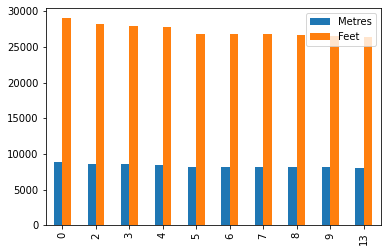

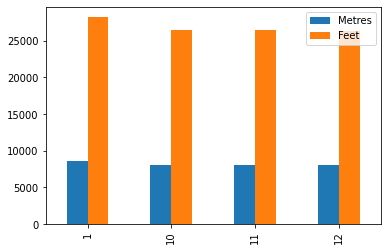

In [8]:
bardf.plot(kind='bar')

Here i have used a groupby function now i will create box plot of the height in feet

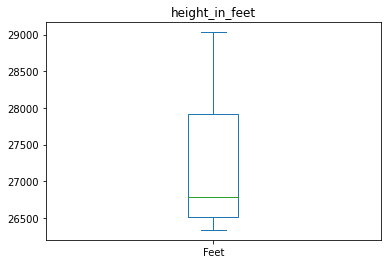

In [9]:
df['Feet'].plot(kind='box', title='height_in_feet')

i have used a function plot here to find it.

In [10]:
df.Feet.describe()

count       14.000000
mean     27178.214286
std        879.975452
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29032.000000
Name: Feet, dtype: float64

In [16]:
df.Feet.mean()

27178.214285714286

In [17]:
df.groupby('Range').mean()

,Metres,Feet
Range,,
Himalayas,8319.80,27295.9
Karakoram,8194.25,26884.0


In [12]:
df.groupby('Range').median()

,Metres,Feet
Range,,
Himalayas,8177.5,26829.5
Karakoram,8065.5,26461.5


In [15]:
from scipy import stats
df.groupby(['Mountain'])['Range'].sum()

Mountain
Annapurna                         Himalayas
Broad Peak                        Karakoram
Cho Oyu                           Himalayas
Dhaulagiri                        Himalayas
Gasherbrum I (Hidden peak; K5)    Karakoram
Gasherbrum II (K4)                Karakoram
K2                                Karakoram
Kangchenjunga                     Himalayas
Lhotse                            Himalayas
Makalu                            Himalayas
Manaslu                           Himalayas
Mount Everest                     Himalayas
Nanga Parbat                      Himalayas
Shishapangma                      Himalayas
Name: Range, dtype: object

In [13]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [18]:
%%bigquery --project data-visualization-bjkc
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
limit 5

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,b8e0c2e280a66fd9ae089df2f4759d6a3b0be246,b2f6b3dd391f77e0791cae7943dae465cf9859b13c86e9...,2014-12-11 17:00:00+00:00,2014-12-11 17:00:00+00:00,0,0.0,None,None,None,None,7.85,1.00,0.0,0.0,8.85,Credit Card,Suburban Dispatch LLC,None,None,None,None,None,None
1,3e0ba7c63441a7277c4475c05fac1826d5825081,b1de4d4ce24ec1a8e9d0cd77d9aa3f7b340b8297297efd...,2015-02-05 20:30:00+00:00,2015-02-05 20:30:00+00:00,0,0.0,None,None,None,None,6.45,0.00,0.0,0.0,6.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,b27a2815af3491b6004573250c890b55c0e64e77,ae0fb599586f950b7811c99713a56c03504a54c30c6cde...,2015-02-05 18:45:00+00:00,2015-02-05 18:45:00+00:00,0,0.0,None,None,None,None,13.65,2.73,0.0,0.0,16.38,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
3,0cd7097adfa219daef29c655cc0c76bdbd2028df,07009b8e9b32f36656567f7809b970af38e59dbb58704a...,2015-02-07 03:45:00+00:00,2015-02-07 03:45:00+00:00,0,0.0,None,None,None,None,14.35,0.00,0.0,0.0,14.35,Credit Card,Suburban Dispatch LLC,None,None,None,None,None,None
4,26ee1435374aaefd2d8b21e2048780f315ddeece,b884dd3799982951b7b1293d92a3e6e90ba3483a6fdbf2...,2015-02-03 09:45:00+00:00,2015-02-03 09:45:00+00:00,0,0.0,None,None,None,None,8.25,2.06,0.0,0.0,10.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None


alltogether it have 21938 rows

In [19]:
%%bigquery --project data-visualization-bjkc
SELECT COUNT(unique_key) as unique_key, fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY fare
Order by unique_key
#total rows

,unique_key,fare
0,1,98.07
1,1,369.28
2,1,455.85
3,1,565.10
4,1,2312.17
...,...,...
21933,3716346,8.25
21934,4899253,7.25
21935,5486284,5.25
21936,5968110,6.25


now i will find average trip on payment type

In [21]:
%%bigquery --project data-visualization-bjkc
SELECT AVG(trip_total) as trip_total, payment_type
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type
Order by trip_total

,trip_total,payment_type
0,10.116931,Pcard
1,12.265548,Cash
2,15.496588,Dispute
3,15.836177,No Charge
4,16.639366,Way2ride
5,17.649893,Unknown
6,18.788039,Split
7,20.320682,Prcard
8,20.339910,Mobile
9,20.524892,Credit Card


now i will find non-zero recorded time above average time

In [22]:
%%bigquery --project data-visualization-bjkc
SELECT COUNT(trip_start_timestamp)>0
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,f0_
0,True


I think as a computer science major it will be one of my long taking time assignment but worth it.I spend almost 5 hour straight when i first started did my code wrong with a simple letter took so long to find it and also missing comma altogether it took me more than 12 hour. i could not do it in one-sitting at all.The first part of the question was the easiest part finding all height above 8000 meter part for me the hardest part was to find the mean and median ,it should not have been that hard i was doing simple mistake with no comma and a one letter mistake i will be excited to use big query plublic data set again as we have used this in many other previous quiz and is easier for me than others.